<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [12]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import missingno as msno

import seaborn as sns
#seaborn.set_context('talk')

In [2]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'4.11.0'

In [3]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [76]:
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

1. Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
  1. Justificar cada columna no seleccionada.
  2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.


In [129]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<AxesSubplot:>

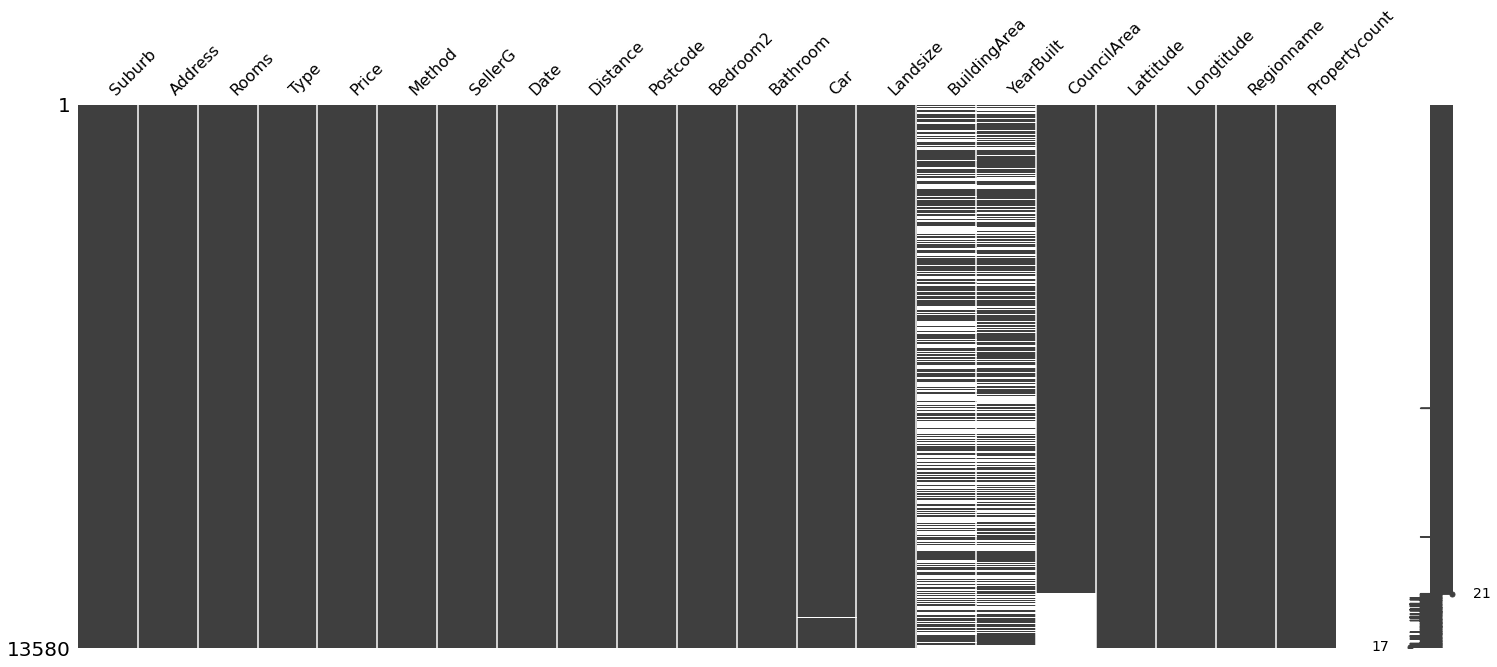

In [21]:
msno.matrix(melb_df)

<AxesSubplot:>

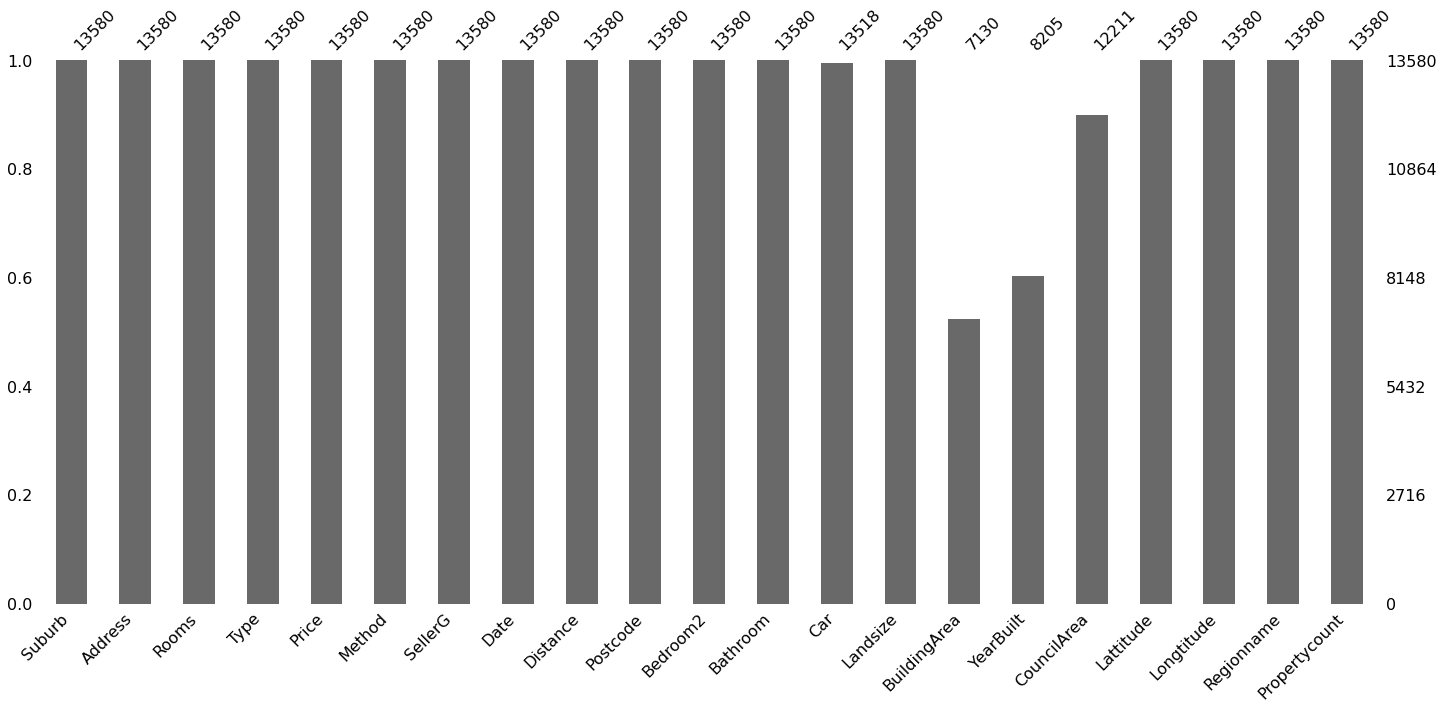

In [22]:
msno.bar(melb_df)

In [78]:
melb_df = melb_df.drop(['BuildingArea', 'YearBuilt', 'Bedroom2'], axis=1)
#justificar

In [77]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [79]:
#MEtricas de distribucion
print("La media de la variable precio es de", melb_df.Price.mean())
print("El valor máximo de la variable precio es de", melb_df.Price.max())
print("La valor mínimo la variable precio es de", melb_df.Price.min())

La media de la variable precio es de 1075684.079455081
El valor máximo de la variable precio es de 9000000.0
La valor mínimo la variable precio es de 85000.0


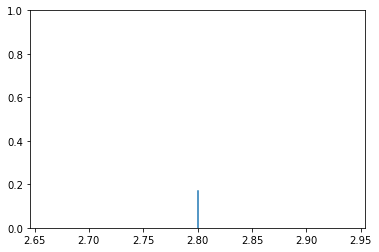

In [80]:
plt.axvline(2.8, 0,0.17)

<Figure size 720x432 with 0 Axes>

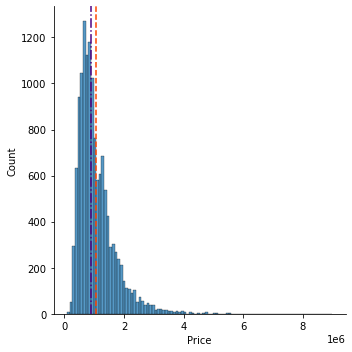

In [81]:
plt.figure(figsize=(10,6))
sns.displot(melb_df, x="Price", bins=100)
#plt.axvline(x=melb_df.Price.mean,ymin=0.25, ymax=1)
plt.axvline(melb_df.Price.mean(), color='orangered',
            linestyle='--', label='Media')
plt.axvline(melb_df.Price.median(), color='indigo',
            linestyle='-.', label='Mediana')

In [82]:
melb_df.SellerG.nunique()

268

In [106]:
melb_out = melb_df.SellerG.value_counts()

In [107]:
melb_out.columns()

AttributeError: 'Series' object has no attribute 'columns'

In [117]:
seller_with_one = melb_out[melb_out.values == 1].index

In [121]:
melb_df.SellerG.replace(to_replace=seller_with_one, value="otros", inplace=True)

In [122]:
melb_df.SellerG.nunique()

191

In [128]:
melb_df[melb_df["SellerG"] == "otros"]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
55,Airport West,241 Parer Rd,5,h,755000.0,PI,otros,14/05/2016,13.5,3042.0,2.0,2.0,596.0,Moonee Valley,-37.72480,144.86990,Western Metropolitan,3464.0
512,Balwyn,129 Gordon St,3,h,2200000.0,S,otros,3/12/2016,9.7,3103.0,3.0,2.0,651.0,Boroondara,-37.80850,145.07640,Southern Metropolitan,5682.0
622,Balwyn North,41 Helston St,4,h,1800000.0,VB,otros,10/12/2016,9.2,3104.0,2.0,4.0,587.0,Boroondara,-37.78410,145.09530,Southern Metropolitan,7809.0
1049,Brighton,4/78 Dendy St,3,h,1390000.0,S,otros,4/03/2017,11.2,3186.0,1.0,2.0,340.0,Bayside,-37.92050,145.00070,Southern Metropolitan,10579.0
1432,Brunswick West,9/39 Heller St,1,u,330000.0,S,otros,22/05/2016,5.9,3055.0,1.0,1.0,0.0,Moreland,-37.77480,144.94830,Northern Metropolitan,7082.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13221,Keysborough,7 Allawah Cl,3,h,770000.0,S,otros,23/09/2017,25.2,3173.0,1.0,4.0,533.0,NaN,-37.98433,145.17041,South-Eastern Metropolitan,8459.0
13242,Mulgrave,5 Lola St,5,h,880000.0,PI,otros,23/09/2017,18.8,3170.0,3.0,2.0,654.0,NaN,-37.92914,145.17372,South-Eastern Metropolitan,7113.0
13338,Altona,20 Burt St,3,h,920000.0,VB,otros,26/08/2017,11.0,3018.0,2.0,2.0,584.0,NaN,-37.86249,144.82162,Western Metropolitan,5301.0
13446,Hampton Park,4 Somerville Rd,4,h,625000.0,S,otros,26/08/2017,33.3,3976.0,1.0,2.0,640.0,NaN,-38.02981,145.24826,South-Eastern Metropolitan,8256.0


In [ ]:
#Valores extremos... podemos quitar los valores outliers conforme al fin del trabajo (cuantil con respecto al precio)



#Criterios para eliminar rows => 
# quitar bathrooms > bedroom
# imputar 1 bathrooms a los que tengan 0
# analizar columnas con strings con valores nulos, falsos, etc
# algun otro que aparezca...

#Punto 2-b - analizar variables categoricas y ver de poder agrupar. Asi como se hizo de manera manual con los valores Seller = 1, buscar metodo/
#para toda categorica de acuerdo ej. a cuantil, y colocar valores genericos a ellas. 


#Punto 3 - Ver variables para mergear los datasets df y airbnb 
    #zipcode, suburbio, street + direction, latitud y longitud aproximada (como ver de buscar la cercania)

In [131]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

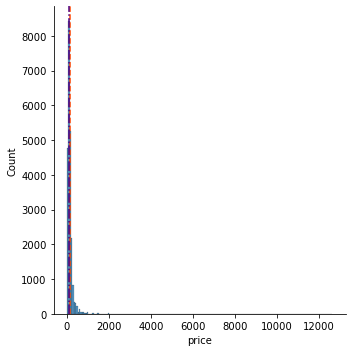

In [136]:
plt.figure(figsize=(10,6))
sns.displot(airbnb_df, x="price", bins=200)
#plt.axvline(x=melb_df.Price.mean,ymin=0.25, ymax=1)
plt.axvline(airbnb_df.price.mean(), color='orangered',
            linestyle='--', label='Media')
plt.axvline(airbnb_df.price.median(), color='indigo',
            linestyle='-.', label='Mediana')

In [137]:
airbnb_df.describe()

,latitude,longitude,price,weekly_price,monthly_price
count,22895.000000,22895.000000,22895.000000,2524.000000,1891.000000
mean,-37.826827,145.008457,148.004368,906.976228,3234.346906
std,0.066747,0.127711,210.883253,821.223782,2808.092144
min,-38.224427,144.484326,0.000000,91.000000,400.000000
25%,-37.852665,144.957692,71.000000,450.000000,1700.000000
50%,-37.817855,144.978402,111.000000,750.000000,2800.000000
75%,-37.803176,145.013441,165.000000,1066.000000,3912.500000
max,-37.482595,145.839127,12624.000000,11536.000000,54258.000000


Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.